In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data - MIT-BIH Arrhythmia Dataset

## Dataset Structure

### Files
- **mitbih_train.csv:** ~87,000 samples  
- **mitbih_test.csv:** ~21,000 samples  

### Features
- **187 features:** ECG signal values (time-series data points)  
- **1 target column:** Classification labels (classes 0–4)

## Classes

The dataset contains five types of heartbeat classifications:

| **Class** | **Type** | **Description** |
|:----------:|:----------|:----------------|
| 0 | Normal (N) | Normal heartbeat |
| 1 | Supraventricular (S) | Supraventricular premature beat |
| 2 | Ventricular (V) | Ventricular premature beat |
| 3 | Fusion (F) | Fusion of ventricular and normal beat |
| 4 | Unclassifiable (Q) | Unclassifiable beat |

In [2]:
df_train=pd.read_csv("../data/mitbih_train.csv",header=None)
df_test=pd.read_csv("../data/mitbih_test.csv",header=None)

In [3]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
print("Train shape:",df_train.shape)
print("Test shape:",df_test.shape)

Train shape: (87554, 188)
Test shape: (21892, 188)


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21892 entries, 0 to 21891
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 31.4 MB


In [8]:
X_train=df_train.iloc[:,:-1].values
y_train=df_train.iloc[:,-1].values.astype(int)

X_test=df_test.iloc[:,:-1].values
y_test=df_test.iloc[:,-1].values.astype(int)

In [9]:
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (87554, 187)
y_train: (87554,)
X_test: (21892, 187)
y_test: (21892,)


In [10]:
print("=== Class Distribution in Training Set ===")
class_names=['Normal','Supraventricular','Ventricular','Fusion','Unclassifiable']
for i in range(5):
    count=np.sum(y_train==i)
    percentage=100*count/len(y_train)
    print(f"Class {i} ({class_names[i]}): {count} ({percentage:.2f}%)")

print("\n=== Class Distribution in Test Set ===")
for i in range(5):
    count=np.sum(y_test == i)
    percentage=100*count/len(y_test)
    print(f"Class {i} ({class_names[i]}): {count} ({percentage:.2f}%)")

=== Class Distribution in Training Set ===
Class 0 (Normal): 72471 (82.77%)
Class 1 (Supraventricular): 2223 (2.54%)
Class 2 (Ventricular): 5788 (6.61%)
Class 3 (Fusion): 641 (0.73%)
Class 4 (Unclassifiable): 6431 (7.35%)

=== Class Distribution in Test Set ===
Class 0 (Normal): 18118 (82.76%)
Class 1 (Supraventricular): 556 (2.54%)
Class 2 (Ventricular): 1448 (6.61%)
Class 3 (Fusion): 162 (0.74%)
Class 4 (Unclassifiable): 1608 (7.35%)


In [11]:
print("Missing values in training data:",df_train.isnull().sum().sum())
print("Missing values in test data:",df_test.isnull().sum().sum())

Missing values in training data: 0
Missing values in test data: 0


In [12]:
print(df_train.isnull().sum())
print(df_test.isnull().sum())

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64
0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64


In [13]:
print("Duplicate rows in training data:",df_train.duplicated().sum())
print("Duplicate rows in test data:",df_test.duplicated().sum())

Duplicate rows in training data: 0
Duplicate rows in test data: 0


In [14]:
print("Min value:",np.min(X_train))
print("Max value:",np.max(X_train))
print("Mean value:",np.mean(X_train))

Min value: 0.0
Max value: 1.0
Mean value: 0.17428295254906354


In [15]:
print(f"Training set - Min: {X_train.min():.4f}, Max: {X_train.max():.4f}, Mean: {X_train.mean():.4f}, Std: {X_train.std():.4f}")
print(f"Test set - Min: {X_test.min():.4f}, Max: {X_test.max():.4f}, Mean: {X_test.mean():.4f}, Std: {X_test.std():.4f}")

Training set - Min: 0.0000, Max: 1.0000, Mean: 0.1743, Std: 0.2263
Test set - Min: 0.0000, Max: 1.0000, Mean: 0.1735, Std: 0.2256


In [16]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [17]:
print(f"Training set - Min: {X_train_scaled.min():.4f}, Max: {X_train_scaled.max():.4f}, Mean: {X_train_scaled.mean():.4f}, Std: {X_train_scaled.std():.4f}")
print(f"Test set - Min: {X_test_scaled.min():.4f}, Max: {X_test_scaled.max():.4f}, Mean: {X_test_scaled.mean():.4f}, Std: {X_test_scaled.std():.4f}")

Training set - Min: -3.6959, Max: 31.2370, Mean: -0.0000, Std: 1.0000
Test set - Min: -3.6959, Max: 31.2370, Mean: -0.0048, Std: 0.9946


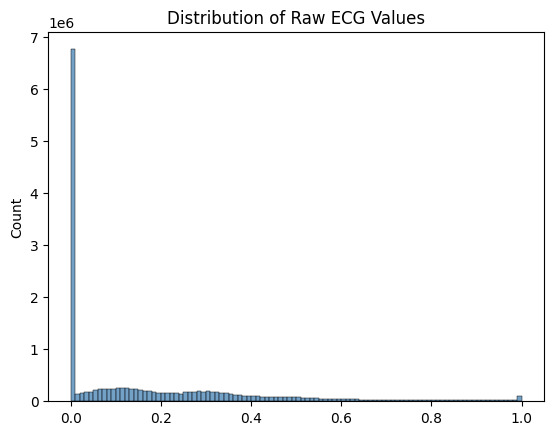

In [18]:
sns.histplot(X_train.flatten(),bins=100,color='steelblue')
plt.title("Distribution of Raw ECG Values")
plt.show()

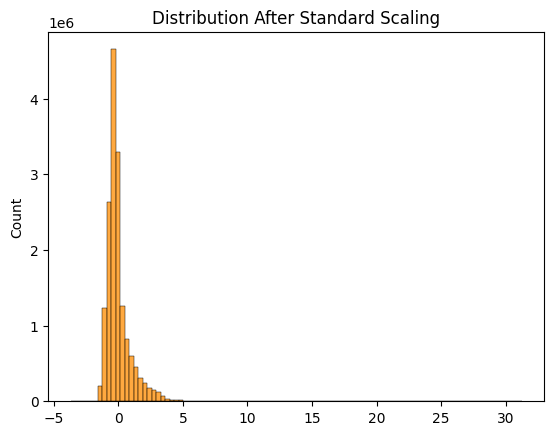

In [19]:
sns.histplot(X_train_scaled.flatten(),bins=100,color='darkorange')
plt.title("Distribution After Standard Scaling")
plt.show()

In [20]:
X_train_scaled=X_train_scaled.reshape((X_train_scaled.shape[0],X_train_scaled.shape[1],1))
X_test_scaled=X_test_scaled.reshape((X_test_scaled.shape[0],X_test_scaled.shape[1],1))

In [21]:
print("Reshaped X_train:",X_train_scaled.shape)
print("Reshaped X_test:",X_test_scaled.shape)

Reshaped X_train: (87554, 187, 1)
Reshaped X_test: (21892, 187, 1)


In [22]:
np.save("../data/X_train_scaled.npy",X_train_scaled)
np.save("../data/X_test_scaled.npy",X_test_scaled)
np.save("../data/y_train.npy",y_train)
np.save("../data/y_test.npy",y_test)

In [23]:
X_train_check=np.load("../data/X_train_scaled.npy")
print("Loaded X_train shape:",X_train_check.shape)

Loaded X_train shape: (87554, 187, 1)


In [24]:
X_test_check=np.load("../data/X_test_scaled.npy")
print("Loaded X_test shape:",X_test_check.shape)

Loaded X_test shape: (21892, 187, 1)


In [25]:
print("Unique labels in Training Set:",np.unique(y_train))
print("Unique labels in Test Set:",np.unique(y_test))

Unique labels in Training Set: [0 1 2 3 4]
Unique labels in Test Set: [0 1 2 3 4]


In [26]:
print("Label distribution in Training Set:")
print(pd.Series(y_train).value_counts().sort_index())

Label distribution in Training Set:
0    72471
1     2223
2     5788
3      641
4     6431
Name: count, dtype: int64


In [27]:
print("Label distribution in Test Set:")
print(pd.Series(y_test).value_counts().sort_index())

Label distribution in Test Set:
0    18118
1      556
2     1448
3      162
4     1608
Name: count, dtype: int64


In [28]:
print("=== Class Distribution (Imbalance Analysis) ===")

class_names=['Normal','Supraventricular','Ventricular','Fusion','Unclassifiable']

print("\nTraining Set:")
for i,name in enumerate(class_names):
    count = np.sum(y_train == i)
    pct = 100 * count / len(y_train)
    print(f"  Class {i} ({name:20s}): {count:6d} samples ({pct:5.2f}%)")

print("\nTest Set:")
for i,name in enumerate(class_names):
    count = np.sum(y_test == i)
    pct = 100 * count / len(y_test)
    print(f"  Class {i} ({name:20s}): {count:6d} samples ({pct:5.2f}%)")


=== Class Distribution (Imbalance Analysis) ===

Training Set:
  Class 0 (Normal              ):  72471 samples (82.77%)
  Class 1 (Supraventricular    ):   2223 samples ( 2.54%)
  Class 2 (Ventricular         ):   5788 samples ( 6.61%)
  Class 3 (Fusion              ):    641 samples ( 0.73%)
  Class 4 (Unclassifiable      ):   6431 samples ( 7.35%)

Test Set:
  Class 0 (Normal              ):  18118 samples (82.76%)
  Class 1 (Supraventricular    ):    556 samples ( 2.54%)
  Class 2 (Ventricular         ):   1448 samples ( 6.61%)
  Class 3 (Fusion              ):    162 samples ( 0.74%)
  Class 4 (Unclassifiable      ):   1608 samples ( 7.35%)


In [29]:
class_counts = [np.sum(y_train == i) for i in range(5)]

majority_count = max(class_counts)
minority_count = min(class_counts)

imbalance_ratio = majority_count / minority_count

print("=== Class Imbalance Ratio (Training Set) ===")
print(f"Majority class samples : {majority_count}")
print(f"Minority class samples : {minority_count}")
print(f"Imbalance Ratio        : {imbalance_ratio:.2f} : 1")


=== Class Imbalance Ratio (Training Set) ===
Majority class samples : 72471
Minority class samples : 641
Imbalance Ratio        : 113.06 : 1


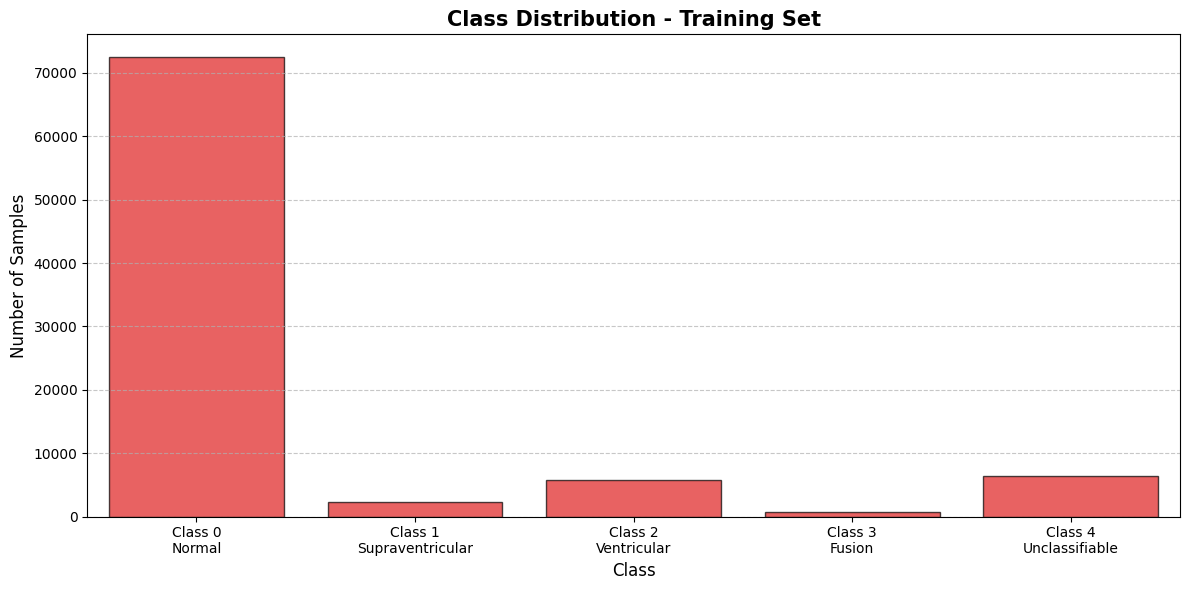

In [30]:
class_names = ['Normal', 'Supraventricular', 'Ventricular', 'Fusion', 'Unclassifiable']

train_counts = [np.sum(y_train == i) for i in range(5)]

plt.figure(figsize=(12,6))
sns.barplot(x=[f"Class {i}\n{name}" for i, name in enumerate(class_names)],y=train_counts, color='red', edgecolor='black', alpha=0.7)

plt.title("Class Distribution - Training Set", fontsize=15, weight='bold')
plt.xlabel("Class", fontsize=12)
plt.ylabel("Number of Samples", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [31]:
import plotly.express as px

labels = {
    0: "Normal",
    1: "Supraventricular Premature",
    2: "Premature Ventricular Contraction",
    3: "Fusion of Ventricular and Normal",
    4: "Unclassifiable"
}

value_counts = df_train.iloc[:, -1].value_counts().sort_index().rename(labels)

pie_fig = px.pie(names=value_counts.index, values=value_counts.values,title="Percentage Distribution of Heartbeat Types in Training Dataset",hole=0.3) 
pie_fig.update_layout(title_x=0.5, width=900, height=600)
pie_fig.show()

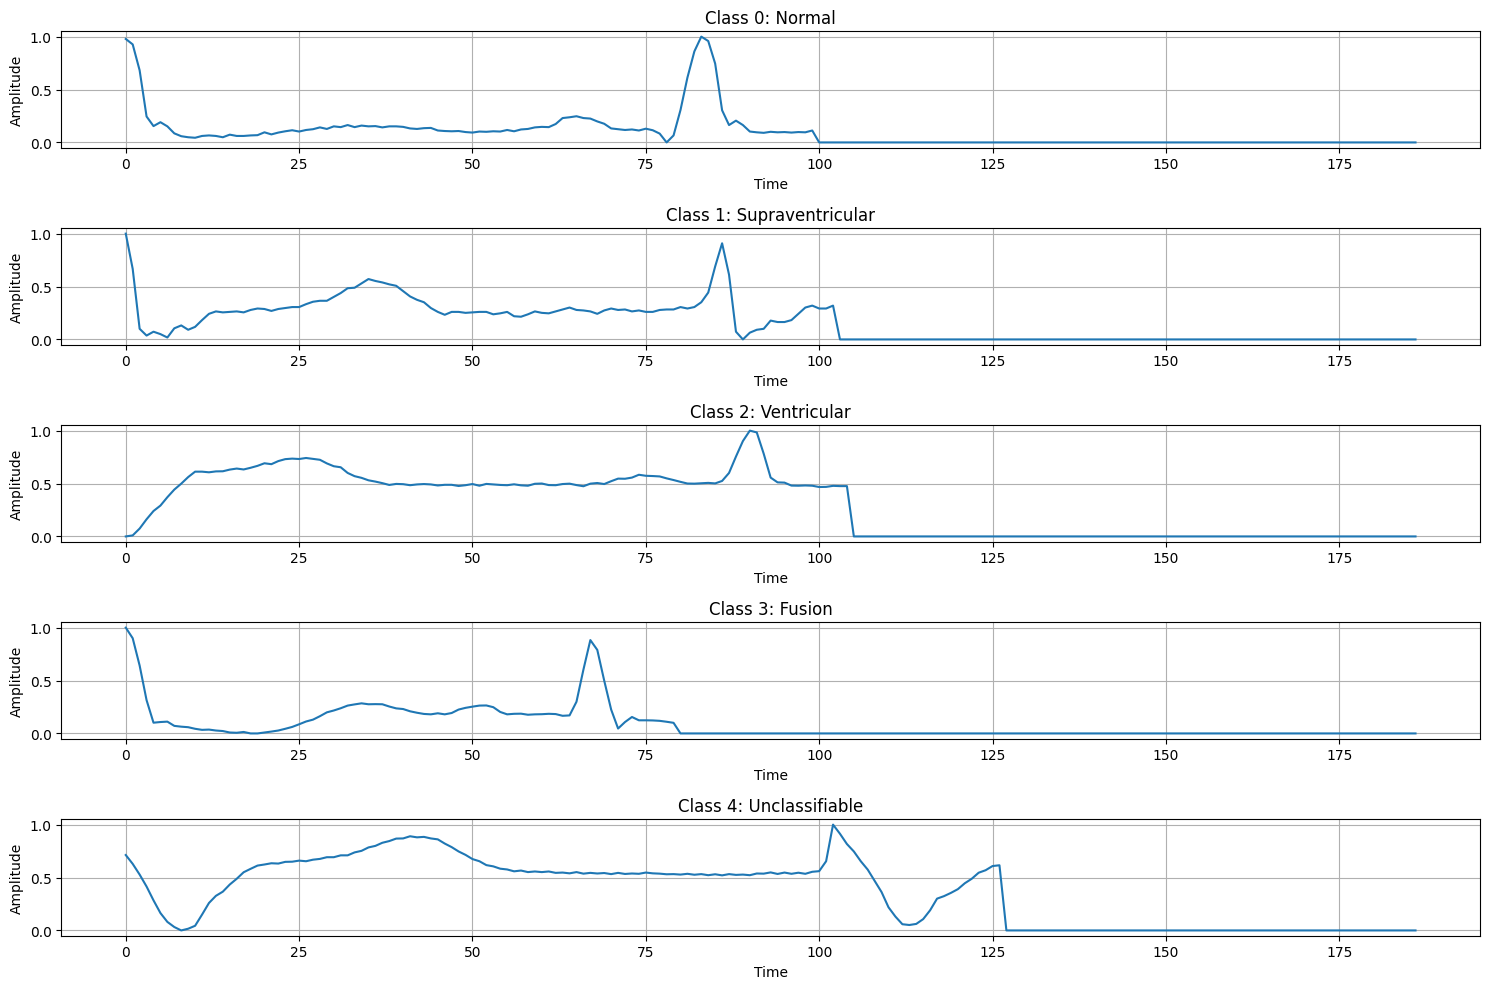

In [32]:
fig, axes = plt.subplots(5, 1, figsize=(15, 10))
for i in range(5):
    idx = np.where(y_train == i)[0][0] # Find first signal from class i
    axes[i].plot(X_train[idx])
    axes[i].set_title(f'Class {i}: {class_names[i]}')
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Amplitude')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

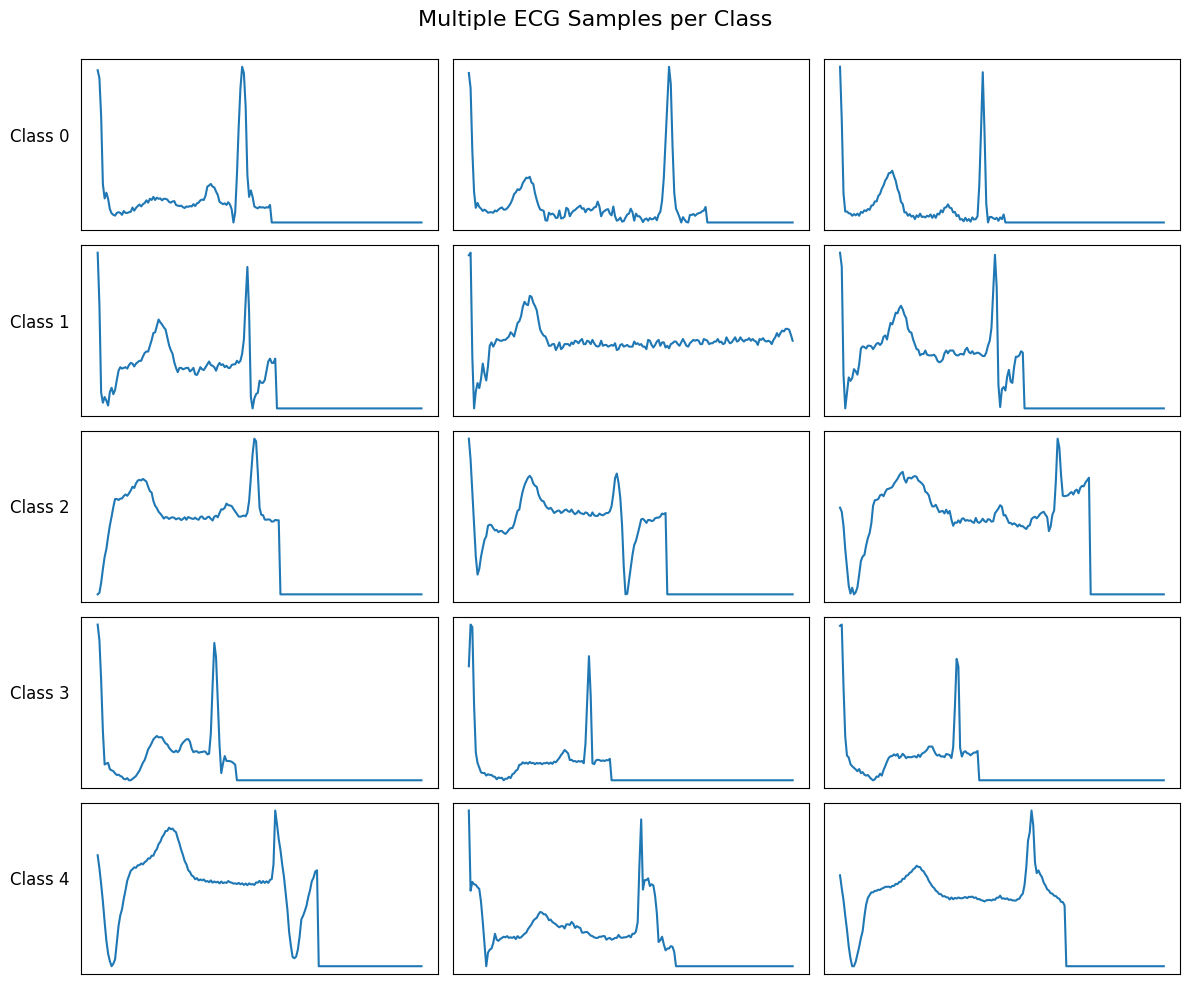

In [33]:
num_classes=len(np.unique(y_train))
samples_per_class = 3

fig, axes = plt.subplots(num_classes, samples_per_class, figsize=(12, 10), sharex=True, sharey=True)
fig.suptitle("Multiple ECG Samples per Class", fontsize=16)

for i, label in enumerate(sorted(np.unique(y_train))):
    indices = np.where(y_train == label)[0][:samples_per_class]
    for j, idx in enumerate(indices):
        axes[i, j].plot(X_train[idx])
        if j == 0:
            axes[i, j].set_ylabel(f"Class {label}", rotation=0, labelpad=30, fontsize=12)
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

=== Sample ECG Signals Visualization ===


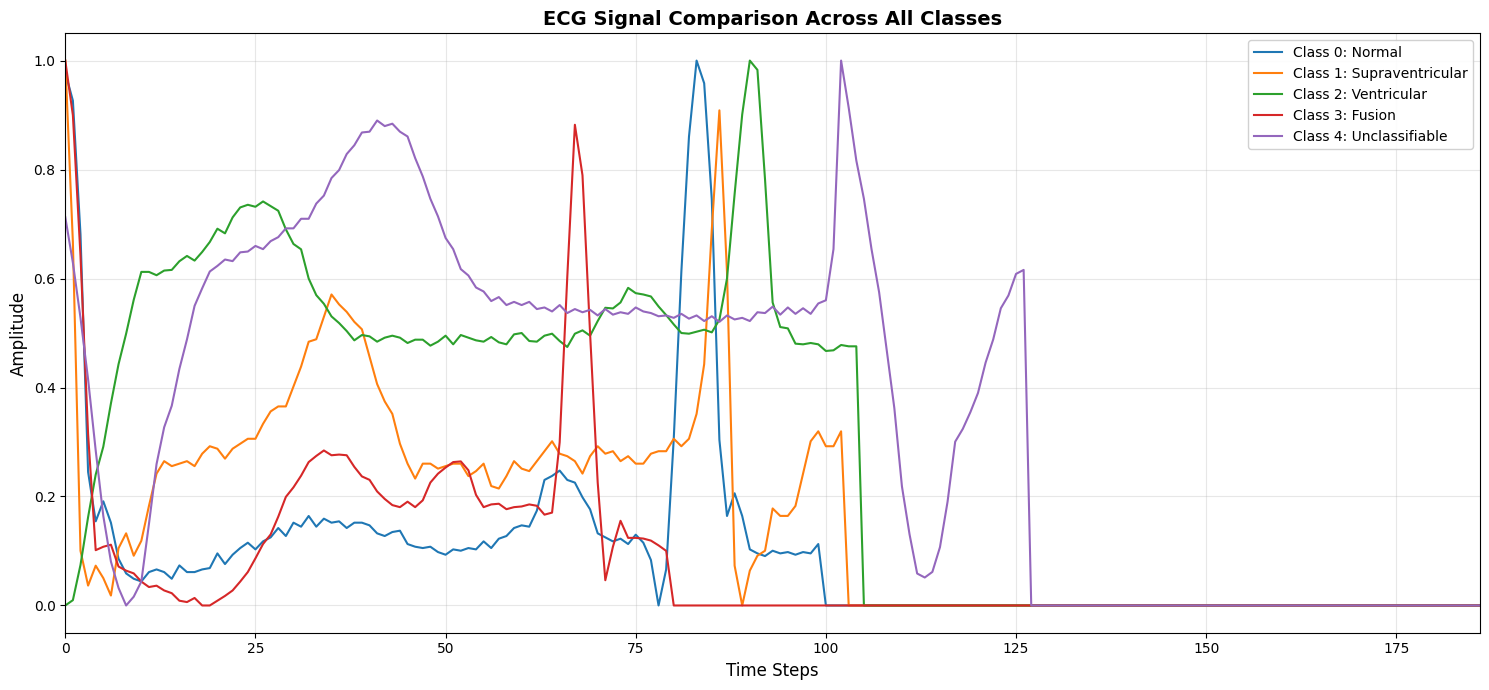

In [34]:
print("=== Sample ECG Signals Visualization ===")
plt.figure(figsize=(15, 7))

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

for i, name in enumerate(class_names):
    idx = np.where(y_train == i)[0][0]  # first index of each class
    plt.plot(X_train[idx], label=f"Class {i}: {name}", color=colors[i], linewidth=1.5)

plt.title('ECG Signal Comparison Across All Classes', fontsize=14, fontweight='bold')
plt.xlabel('Time Steps', fontsize=12)
plt.ylabel('Amplitude', fontsize=12)
plt.legend(loc='upper right', fontsize=10, framealpha=0.9)
plt.grid(True, alpha=0.3)
plt.xlim(0, 186)
plt.tight_layout()
plt.show()

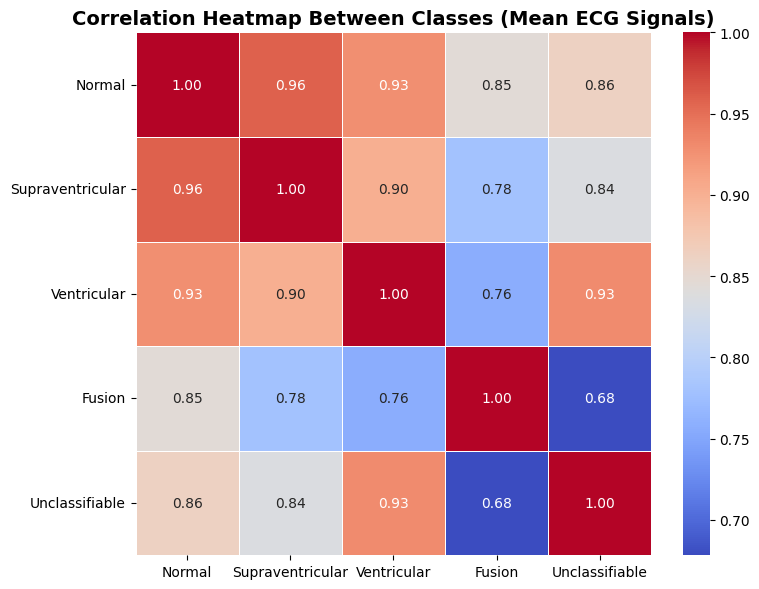

In [35]:
mean_signals = []
for i in range(5):
    class_data = X_train[y_train == i]
    mean_wave = np.mean(class_data, axis=0).flatten()
    mean_signals.append(mean_wave)

mean_signals_df = pd.DataFrame(mean_signals, index=class_names).T

corr_matrix = mean_signals_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap Between Classes (Mean ECG Signals)", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

=== SIGNAL ENERGY ANALYSIS ===

  Class             Name  Mean Energy  Std Energy  Min Energy  Max Energy
     0           Normal    13.582902   13.263914    2.286797   99.040294
     1 Supraventricular    15.634613    9.196356    1.523412   50.206226
     2      Ventricular    24.747342   16.452257    3.207276  115.040671
     3           Fusion     9.120216    8.914649    1.857704  118.638845
     4   Unclassifiable    24.827532   13.811816    1.840381   57.688103


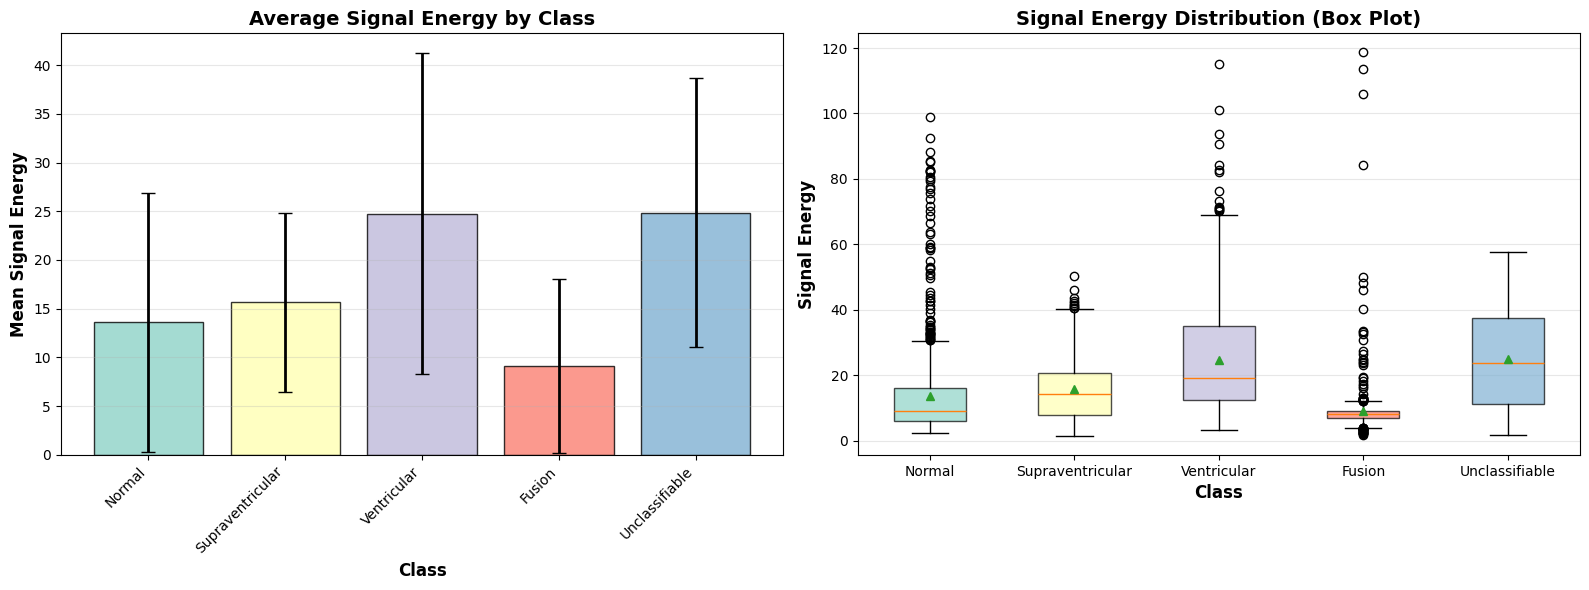

In [36]:
print("=== SIGNAL ENERGY ANALYSIS ===")

CLASS_NAMES_SHORT = ['Normal', 'Supraventricular', 'Ventricular', 'Fusion', 'Unclassifiable']
NUM_CLASSES = len(CLASS_NAMES_SHORT)

energy_data = []

# Calculate signal energy statistics per class
for class_id in range(NUM_CLASSES):
    class_samples = df_train[df_train.iloc[:, -1] == class_id]
    
    # Compute signal energies (limit to 1000 samples for speed)
    energies = []
    for idx in range(min(1000, len(class_samples))):
        signal = class_samples.iloc[idx, :-1].values
        energy = np.sum(signal ** 2)
        energies.append(energy)
    
    # Store summary statistics
    energy_data.append({
        'Class': class_id,
        'Name': CLASS_NAMES_SHORT[class_id],
        'Mean Energy': np.mean(energies),
        'Std Energy': np.std(energies),
        'Min Energy': np.min(energies),
        'Max Energy': np.max(energies)
    })

# Convert to DataFrame and display
energy_df = pd.DataFrame(energy_data)
print("\n", energy_df.to_string(index=False))
print("=" * 80)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Bar Chart with Error Bars ---
axes[0].bar(range(NUM_CLASSES), energy_df['Mean Energy'], color=plt.cm.Set3(range(NUM_CLASSES)), alpha=0.8, edgecolor='black')
axes[0].errorbar(range(NUM_CLASSES), energy_df['Mean Energy'], yerr=energy_df['Std Energy'], fmt='none', color='black', capsize=5, linewidth=2)
axes[0].set_xlabel('Class', fontweight='bold', fontsize=12)
axes[0].set_ylabel('Mean Signal Energy', fontweight='bold', fontsize=12)
axes[0].set_title('Average Signal Energy by Class', fontweight='bold', fontsize=14)
axes[0].set_xticks(range(NUM_CLASSES))
axes[0].set_xticklabels(CLASS_NAMES_SHORT, rotation=45, ha='right')
axes[0].grid(axis='y', alpha=0.3)

# --- Box Plot for Distribution (using tick_labels instead of labels) ---
box_data = []
for class_id in range(NUM_CLASSES):
    class_samples = df_train[df_train.iloc[:, -1] == class_id]
    energies = [np.sum(class_samples.iloc[idx, :-1].values ** 2) for idx in range(min(1000, len(class_samples)))]
    box_data.append(energies)

bp = axes[1].boxplot(
    box_data,
    tick_labels=CLASS_NAMES_SHORT, 
    patch_artist=True,
    showmeans=True
)

for patch, color_idx in zip(bp['boxes'], range(NUM_CLASSES)):
    patch.set_facecolor(plt.cm.Set3(color_idx))
    patch.set_alpha(0.7)

axes[1].set_xlabel('Class', fontweight='bold', fontsize=12)
axes[1].set_ylabel('Signal Energy', fontweight='bold', fontsize=12)
axes[1].set_title('Signal Energy Distribution (Box Plot)', fontweight='bold', fontsize=14)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()